In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [83]:
# Load the CSV file containing features and labels
data = pd.read_csv('ravdess_features.csv')

# Separate features and labels
X = data.drop(columns=['filename', 'emotion'])
y = data['emotion']

In [84]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Convert categorical labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [86]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (1152, 88)
Test data shape: (288, 88)


In [88]:
# Define the CNN model
# def create_cnn_model(input_shape, num_classes):
#     model = models.Sequential()
#     model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Conv1D(128, 3, activation='relu'))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for classification
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# def create_cnn_model(input_shape, num_classes):
#     model = models.Sequential()
#     model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Conv1D(128, 3, activation='relu'))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Conv1D(256, 3, activation='relu'))  # Adding another Conv1D layer
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for classification
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model


# def create_cnn_model(input_shape, num_classes):
#     model = models.Sequential()
#     model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Conv1D(128, 3, activation='relu'))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Dropout(0.5))  # Adding dropout to prevent overfitting
#     model.add(layers.Conv1D(256, 3, activation='relu'))
#     model.add(layers.MaxPooling1D(2))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dropout(0.5))  # Dropout after Dense layer
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(num_classes, activation='softmax'))
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model



In [95]:
from tensorflow.keras.optimizers import Adam


In [ ]:
def create_cnn_model(input_shape, num_classes, learning_rate=0.001):
    model = models.Sequential()
    model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)  # Customize learning rate
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [89]:
# Reshape input data for CNN (1D convolution)
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

In [ ]:
# # Create and train the CNN model
# model = create_cnn_model((X_train_reshaped.shape[1], 1), len(label_encoder.classes_))
# history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Try different learning rates
learning_rates = [0.001, 0.0005, 0.0001]
for lr in learning_rates:
    model = create_cnn_model((X_train_reshaped.shape[1], 1), len(label_encoder.classes_), learning_rate=lr)
    history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/20


c:\Users\anany\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2260 - loss: 1.9703 - val_accuracy: 0.3681 - val_loss: 1.6287
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4126 - loss: 1.5629 - val_accuracy: 0.4028 - val_loss: 1.4860
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5080 - loss: 1.3508 - val_accuracy: 0.4583 - val_loss: 1.4283
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6051 - loss: 1.0952 - val_accuracy: 0.4931 - val_loss: 1.3803
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6636 - loss: 0.9578 - val_accuracy: 0.5347 - val_loss: 1.3038
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7174 - loss: 0.8214 - val_accuracy: 0.5174 - val_loss: 1.3504
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6941 - loss: 0.7700 - val_accuracy: 0.5243 - val_loss: 1.3459
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8115 - loss: 0.5856 - val_accuracy: 0.5694 - val_loss: 1.2314
Ep

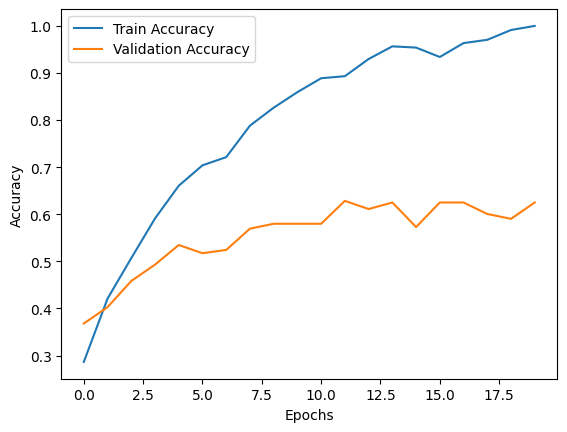

In [91]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

9/9 - 0s - 4ms/step - accuracy: 0.6250 - loss: 1.9558
Test accuracy: 0.625


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 86, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,634 (4.14 MB)

 Trainable params: 361,544 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 723,090 (2.76 MB)